In [1]:
from pymna import Circuit
from pymna.units import kOhm,uF, V, Hz
from pymna.simulator import Simulator
import matplotlib.pyplot as plt
import os

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%matplotlib ipympl
%autoreload 2
basepath = os.getcwd()
print(basepath)

/Users/jodafons/Desktop/pymna/examples


In [2]:
def get_reference( path ):
    with open(path, 'r') as f:
        lines = f.readlines()
        keys = lines[0].strip().split()
        d={k:[] for k in keys}
        print(keys)
        for l in lines[1::]:
            ll=l.strip().split()
            for idx, key in enumerate(keys):
                d[key].append( float(ll[idx]) )
        return d

ref = get_reference( f'{basepath}/../mna/references/chua_Simulated.tab')


['t', '1', '2', 'J3L0100']


In [3]:
path = f"{basepath}/../mna/netlists/Chua.net"
simulator = Simulator()
results = simulator.run_from_nl(path)




R0102 1 2 1.9
L0100 1 0 1
C0200 2 0 0.31 IC=1
C0100 1 0 1 IC=1
N0200 2 0 -2 1.1 -1 0.7 1 -0.7 2 -1.1
['.TRAN', '1000', '0.1', 'BE', '1', 'UIC']
Transient simulation started with end_time=1000.0, step_time=0.1
max_number_of_internal_step=1, max_tolerance=1
Max number of nodes: 2


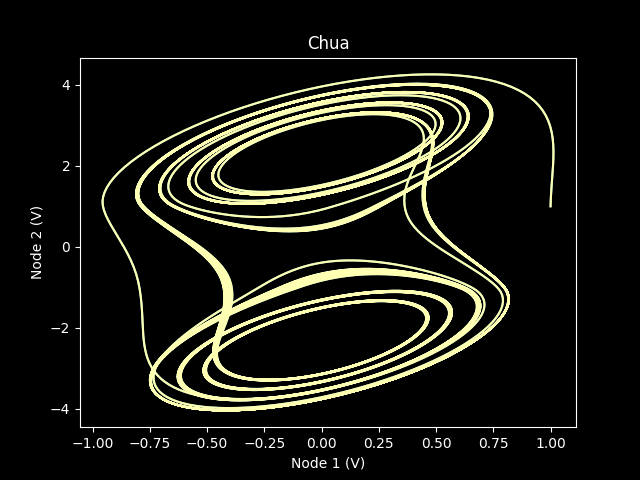

In [8]:
plt.style.use('dark_background')

fig, ax = plt.subplots()
plt.plot( results['1'], results['2'] )
plt.plot( ref['1'], ref['2']  )

ax.set_xlabel('Node 1 (V)')
ax.set_ylabel('Node 2 (V)')
ax.set_title("Chua")

plt.show()
plt.savefig("x.png",dpi=1000)

In [138]:
results

{'t': [1e-13,
  0.00010000000010000001,
  0.00020000000010000001,
  0.0003000000001,
  0.0004000000001,
  0.0005000000001,
  0.0006000000001,
  0.0007000000001000001,
  0.0008000000001000001,
  0.0009000000001000002,
  0.0010000000001,
  0.0011000000001000002,
  0.0012000000001000002,
  0.0013000000001000002,
  0.0014000000001000003,
  0.0015000000001000003,
  0.0016000000001000004,
  0.0017000000001000004,
  0.0018000000001000005,
  0.0019000000001000005,
  0.0020000000001000003,
  0.0021000000001,
  0.0022000000001,
  0.0023000000001,
  0.0024000000000999997,
  0.0025000000000999995,
  0.0026000000000999993,
  0.002700000000099999,
  0.002800000000099999,
  0.002900000000099999,
  0.0030000000000999986,
  0.0031000000000999985,
  0.0032000000000999983,
  0.003300000000099998,
  0.003400000000099998,
  0.0035000000000999978,
  0.0036000000000999976,
  0.0037000000000999974,
  0.0038000000000999973,
  0.003900000000099997,
  0.004000000000099997,
  0.004100000000099998,
  0.00420000000

In [90]:
circuit.nodes

{0: 0, 'in': 1, 'out': 2}